# Capstone project Function 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF,RationalQuadratic, Matern, WhiteKernel
import matplotlib.pyplot as plt
import sklearn
from IPython.display import clear_output
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D plotting
from scipy.interpolate import griddata
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm

/Users/amyjolly/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Description of function 4

Address the challenge of optimally placing products across warehouses for a business with high online sales, where accurate calculations are costly and only feasible biweekly. To speed up decision-making, an ML model approximates these results within hours. The model has four hyperparameters to tune, and its output reflects the difference from the expensive baseline. Because the system is dynamic and full of local optima, it requires careful tuning and robust validation to find reliable, near-optimal solutions.

Input dimensions 4D (30,4) output dimensions 1D (30,1)

### Step 1: Load data and visualise

In [2]:
X = np.load('Initial_inputs.npy')
y = np.load('Initial_outputs.npy')

inputdata = np.load('Initial_inputs.npy')
outputdata = np.load('Initial_outputs.npy')

#Transform y as the value represents diff to baseline
y_transform = -y # negate errors so that "higher = better"
print(X,y_transform)

[[0.89698105 0.72562797 0.17540431 0.70169437]
 [0.8893564  0.49958786 0.53926886 0.50878344]
 [0.25094624 0.03369313 0.14538002 0.49493242]
 [0.34696206 0.0062504  0.76056361 0.61302356]
 [0.12487118 0.12977019 0.38440048 0.2870761 ]
 [0.80130271 0.50023109 0.70664456 0.19510284]
 [0.24770826 0.06044543 0.04218635 0.44132425]
 [0.74670224 0.7570915  0.36935306 0.20656628]
 [0.40066503 0.07257425 0.88676825 0.24384229]
 [0.6260706  0.58675126 0.43880578 0.77885769]
 [0.95713529 0.59764438 0.76611385 0.77620991]
 [0.73281243 0.14524998 0.47681272 0.13336573]
 [0.65511548 0.07239183 0.68715175 0.08151656]
 [0.21973443 0.83203134 0.48286416 0.08256923]
 [0.48859419 0.2119651  0.93917791 0.37619173]
 [0.16713049 0.87655456 0.21723954 0.95980098]
 [0.21691119 0.16608583 0.24137226 0.77006248]
 [0.38748784 0.80453226 0.75179548 0.72382744]
 [0.98562189 0.66693268 0.15678328 0.8565348 ]
 [0.03782483 0.66485335 0.16198218 0.25392378]
 [0.68348638 0.9027701  0.33541983 0.99948256]
 [0.17034731 

### Step 2: Fit surrogate model, in this case GP

In [15]:
kernel = Matern(length_scale=np.ones(4)*0.2, nu=2.5) + WhiteKernel(noise_level=1e-2)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=True, random_state=0)
gp.fit(X, y_transform)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=Matern(length_scale=[0.2, 0.2, 0.2, 0.2], nu=2.5) + WhiteKernel(noise_level=0.01),
                         n_restarts_optimizer=10, normalize_y=True,
                         random_state=0)

In [16]:
n_candidates = 50000
X_cand_scaled = np.random.rand(n_candidates, 4)

# -------------------------
# Predict mean and uncertainty
# -------------------------
mu, sigma = gp.predict(X_cand_scaled, return_std=True)

### Step 3: Use an appropriate acquisition function

In [17]:
kappa = 3.0
UCB = mu + kappa*sigma


In [18]:
# Choose top candidate
next_idx = np.argmax(UCB)
x_next_scaled = X_cand_scaled[next_idx]
x_next = scaler.inverse_transform(x_next_scaled.reshape(1, -1))[0]

print("Next hyperparameters to evaluate:", x_next)

Next hyperparameters to evaluate: [0.95188731 0.91807376 0.92881422 0.97307225]


# ****** Week 2 updates and optimisation *******

## Step 1: Load in updated inputs and outputs

In [3]:
inputdata = np.load('Initial_inputs.npy')
outputdata = np.load('Initial_outputs.npy')

#Read in text file of inputs
with open('../Inputs_Outputs/Week1/inputs.txt', 'r') as f:
    inputs_week2 = f.read()

with open('../Inputs_Outputs/Week1/outputs.txt', 'r') as f:
    outputs_week2 = f.read()

# Step 1: Define a safe namespace for eval
safe_globals = {'np': np, 'array': np.array}

# Step 2: Convert the text to actual Python objects
inputs_week2 = eval(inputs_week2, {"__builtins__": {}}, safe_globals)
outputs_week2 = eval(outputs_week2, {"__builtins__": {}}, safe_globals)

# Step 3: Optional: convert to NumPy arrays of objects
inputs_week2 = np.array(inputs_week2, dtype=object)
outputs_week2 = np.array(outputs_week2, dtype=object)

# Step 4: Select relevant data for your function. In this case we want function 1 inputs and outputs

F4_inputs_week2 = inputs_week2[3]
F4_outputs_week2 = outputs_week2[3]



# Step 5: merge with previous data
F4_inputs_week2 = F4_inputs_week2.reshape(1, -1)
inputdata_week2 = np.concatenate((inputdata,F4_inputs_week2), axis=0)

outputdata_week2 = np.concatenate((outputdata,np.array([F4_outputs_week2])))

print(inputdata_week2)
print(outputdata_week2)

#Save updated data
np.save('inputs_week2.npy',inputdata_week2)
np.save('outputs_week2.npy',outputdata_week2)

[[0.89698105 0.72562797 0.17540431 0.70169437]
 [0.8893564  0.49958786 0.53926886 0.50878344]
 [0.25094624 0.03369313 0.14538002 0.49493242]
 [0.34696206 0.0062504  0.76056361 0.61302356]
 [0.12487118 0.12977019 0.38440048 0.2870761 ]
 [0.80130271 0.50023109 0.70664456 0.19510284]
 [0.24770826 0.06044543 0.04218635 0.44132425]
 [0.74670224 0.7570915  0.36935306 0.20656628]
 [0.40066503 0.07257425 0.88676825 0.24384229]
 [0.6260706  0.58675126 0.43880578 0.77885769]
 [0.95713529 0.59764438 0.76611385 0.77620991]
 [0.73281243 0.14524998 0.47681272 0.13336573]
 [0.65511548 0.07239183 0.68715175 0.08151656]
 [0.21973443 0.83203134 0.48286416 0.08256923]
 [0.48859419 0.2119651  0.93917791 0.37619173]
 [0.16713049 0.87655456 0.21723954 0.95980098]
 [0.21691119 0.16608583 0.24137226 0.77006248]
 [0.38748784 0.80453226 0.75179548 0.72382744]
 [0.98562189 0.66693268 0.15678328 0.8565348 ]
 [0.03782483 0.66485335 0.16198218 0.25392378]
 [0.68348638 0.9027701  0.33541983 0.99948256]
 [0.17034731 

## Step 2: Update surrogate model with new data

/opt/anaconda3/lib/python3.13/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-08. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/gaussian_process/kernels.py:442: Con

Matern(length_scale=[0.759, 0.647, 0.81, 0.735], nu=2.5) + WhiteKernel(noise_level=1e-08)


/opt/anaconda3/lib/python3.13/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/gaussian_process/kernels.py:442: Con

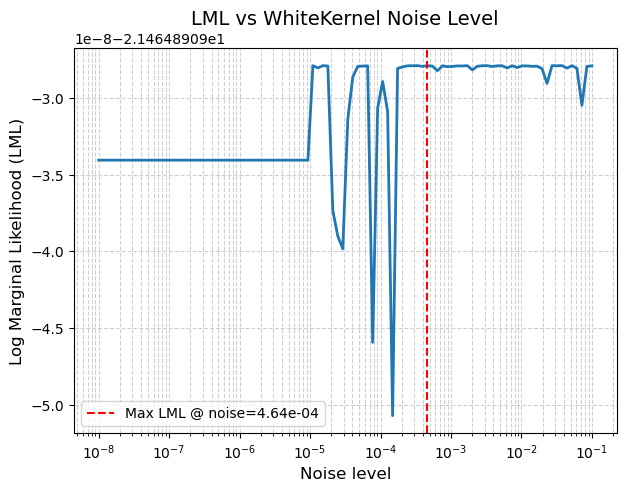

In [19]:
X_wk2 = inputdata_week2
y_wk2 = outputdata_week2
y_transform_wk2 = -y_wk2


kernel = Matern(length_scale=np.ones(4)*0.2, nu=2.5) + WhiteKernel(noise_level_bounds=(1e-8, 1e5))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=True, random_state=0)
gp.fit(X_wk2, y_transform_wk2)
print(gp.kernel_)


# Some sanity checks because of the optimiser warning
# Range of noise levels to scan (log scale)
noise_levels = np.logspace(-8, -1, 100)

# Compute log marginal likelihood (LML) for each noise level
lml_values = []
for nl in noise_levels:
    kernel_test = Matern(length_scale=gp.kernel_.k1.length_scale, nu=2.5) + WhiteKernel(noise_level=nl)
    gp_test = GaussianProcessRegressor(kernel=kernel_test, normalize_y=True, random_state=0)
    gp_test.fit(X_wk2, y_transform_wk2)
    lml_values.append(gp_test.log_marginal_likelihood())

# Plot
plt.figure(figsize=(7,5))
plt.semilogx(noise_levels, lml_values, lw=2)
plt.xlabel("Noise level", fontsize=12)
plt.ylabel("Log Marginal Likelihood (LML)", fontsize=12)
plt.title("LML vs WhiteKernel Noise Level", fontsize=14)
plt.grid(True, which="both", ls="--", alpha=0.6)

best_idx = np.argmax(lml_values)
plt.axvline(noise_levels[best_idx], color='red', linestyle='--', label=f"Max LML @ noise={noise_levels[best_idx]:.2e}")
plt.legend()
plt.show()

In [20]:
n_candidates = 50000
X_cand_scaled = np.random.rand(n_candidates, 4)

# -------------------------
# Predict mean and uncertainty
# -------------------------
mu, sigma = gp.predict(X_cand_scaled, return_std=True)

## Step 3: Fit acquisition parameter

In [31]:
kappa = 3.0
UCB = mu + kappa*sigma
# Choose top candidate
next_idx = np.argmax(UCB)
x_next_scaled = X_cand_scaled[next_idx]
scaler = StandardScaler()
scaler.fit(X_wk2)
x_next = scaler.inverse_transform(x_next_scaled.reshape(1, -1))[0]

print("Next hyperparameters to evaluate:", np.round(x_next,6))

Next hyperparameters to evaluate: [0.844569 0.799075 0.716071 0.777414]


## Visualise this using UCB heatmatps

In [28]:
# Fix other dimensions (param3, param4) at mean
fixed_dims = [2, 3]  # indices of params to fix
fixed_values = X_wk2[:, fixed_dims].mean(axis=0)

# Create a grid for param1 and param2
param1_vals = np.linspace(X_wk2[:,0].min(), X_wk2[:,0].max(), 50)
param2_vals = np.linspace(X_wk2[:,1].min(), X_wk2[:,1].max(), 50)
grid_param1, grid_param2 = np.meshgrid(param1_vals, param2_vals)

In [29]:
# Prepare grid points in 4D
grid_points = np.zeros((grid_param1.size, 4))
grid_points[:,0] = grid_param1.ravel()
grid_points[:,1] = grid_param2.ravel()
grid_points[:,2] = fixed_values[0]  # param3 fixed
grid_points[:,3] = fixed_values[1]  # param4 fixed

# If you scaled your training data, scale grid too
scaler = StandardScaler()
scaler.fit(X_wk2)  # fit on original training data
grid_points_scaled = scaler.transform(grid_points)

# Predict GP mean and std
mu_grid, sigma_grid = gp.predict(grid_points_scaled, return_std=True)
UCB_grid = mu_grid + 3*sigma_grid
UCB_grid = UCB_grid.reshape(grid_param1.shape)

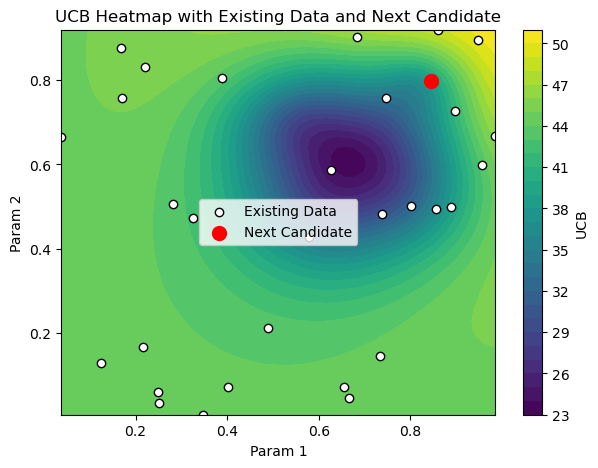

In [30]:
#Plot UCB heatmap


plt.figure(figsize=(7,5))
plt.contourf(grid_param1, grid_param2, UCB_grid, levels=30, cmap='viridis')
plt.colorbar(label='UCB')

# Plot existing data points
plt.scatter(X[:,0], X[:,1], c='white', edgecolor='k', label='Existing Data')

# Plot next candidate
x_next = np.array([0.84456876, 0.7990749, 0.71607125, 0.77741432])
plt.scatter(x_next[0], x_next[1], c='red', s=100, label='Next Candidate')

plt.xlabel('Param 1')
plt.ylabel('Param 2')
plt.title('UCB Heatmap with Existing Data and Next Candidate')
plt.legend()
plt.show()

# ****** Week 3: Updated data for optimisation *********

### Step 1: Load in new data points for surrogate optimisation

In [4]:
#Load in original input and output data 
inputdata = np.load('inputs_week2.npy')
outputdata = np.load('outputs_week2.npy')

#Read in text file of inputs
with open('../Inputs_Outputs/Week2/inputs.txt', 'r') as f:
    inputs_week3 = f.read()

with open('../Inputs_Outputs/Week2/outputs.txt', 'r') as f:
    outputs_week3 = f.read()

# Step 1: Define a safe namespace for eval
safe_globals = {'np': np, 'array': np.array}

# Step 2: Convert the text to actual Python objects
inputs_week3 = eval(inputs_week3, {"__builtins__": {}}, safe_globals)
outputs_week3 = eval(outputs_week3, {"__builtins__": {}}, safe_globals)

# Step 3: Optional: convert to NumPy arrays of objects
inputs_week3 = np.array(inputs_week3, dtype=object)
outputs_week3 = np.array(outputs_week3, dtype=object)

# Step 4: Select relevant data for your function. In this case we want function 1 inputs and outputs

F1_inputs_week3 = inputs_week3[3]
F1_outputs_week3 = outputs_week3[3]


# Step 5: merge with previous data
F1_inputs_week3 = F1_inputs_week3.reshape(1, -1)
inputdata_week3 = np.concatenate((inputdata,F1_inputs_week3), axis=0)

outputdata_week3 = np.concatenate((outputdata,np.array([F1_outputs_week3])))

print(inputdata_week3)
print(outputdata_week3)

# Save the results of these
np.save('inputs_week3.npy',inputdata_week3)
np.save('outputs_week3.npy', outputdata_week3)

[[0.89698105 0.72562797 0.17540431 0.70169437]
 [0.8893564  0.49958786 0.53926886 0.50878344]
 [0.25094624 0.03369313 0.14538002 0.49493242]
 [0.34696206 0.0062504  0.76056361 0.61302356]
 [0.12487118 0.12977019 0.38440048 0.2870761 ]
 [0.80130271 0.50023109 0.70664456 0.19510284]
 [0.24770826 0.06044543 0.04218635 0.44132425]
 [0.74670224 0.7570915  0.36935306 0.20656628]
 [0.40066503 0.07257425 0.88676825 0.24384229]
 [0.6260706  0.58675126 0.43880578 0.77885769]
 [0.95713529 0.59764438 0.76611385 0.77620991]
 [0.73281243 0.14524998 0.47681272 0.13336573]
 [0.65511548 0.07239183 0.68715175 0.08151656]
 [0.21973443 0.83203134 0.48286416 0.08256923]
 [0.48859419 0.2119651  0.93917791 0.37619173]
 [0.16713049 0.87655456 0.21723954 0.95980098]
 [0.21691119 0.16608583 0.24137226 0.77006248]
 [0.38748784 0.80453226 0.75179548 0.72382744]
 [0.98562189 0.66693268 0.15678328 0.8565348 ]
 [0.03782483 0.66485335 0.16198218 0.25392378]
 [0.68348638 0.9027701  0.33541983 0.99948256]
 [0.17034731 

### Step 2: Visualise the results from the last round

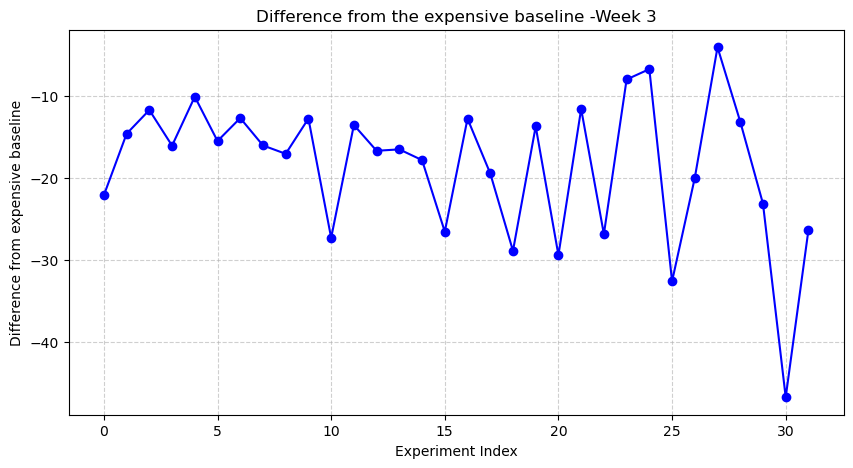

Best parameters: [0.57776561 0.42877174 0.42582587 0.24900741]
Lowest difference: -4.025542281908162


In [11]:
### what are the best outcomes

X_wk3 = inputdata_week3
y_wk3 = outputdata_week3



indices = np.arange(len(y_wk3))

plt.figure(figsize=(10,5))
plt.plot(indices, y_wk3, marker='o', linestyle='-', color='blue')
plt.xlabel('Experiment Index')
plt.ylabel('Difference from expensive baseline')
plt.title('Difference from the expensive baseline -Week 3')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# We can see from this plot that the best yield was from parameters in index 15
best_idx = np.argmax(y_wk3)
best_x = inputdata_week3[best_idx]
best_y = outputdata_week3[best_idx]

print("Best parameters:", best_x)
print("Lowest difference:", best_y)

### Step 3: fit surrogate model

In [12]:
kernel = Matern(length_scale=np.ones(4)*0.2, nu=2.5) + WhiteKernel(noise_level_bounds=(1e-8, 1e5))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=True, random_state=0)
gp.fit(X_wk3, y_wk3)
print(gp.kernel_)

Matern(length_scale=[0.797, 0.695, 0.717, 0.715], nu=2.5) + WhiteKernel(noise_level=1e-08)


/opt/anaconda3/lib/python3.13/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-08. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


In [13]:
n_candidates = 50000
X_cand_scaled = np.random.rand(n_candidates, 4)

# -------------------------
# Predict mean and uncertainty
# -------------------------
mu, sigma = gp.predict(X_cand_scaled, return_std=True)

### Step 4: Fit acquisition parameter - looking for more moderate balance of exploration-exploitation

In [14]:
kappa = 2.0
UCB = mu + kappa*sigma
# Choose top candidate
next_idx = np.argmax(UCB)
x_next_scaled = X_cand_scaled[next_idx]
scaler = StandardScaler()
scaler.fit(X_wk3)
x_next = scaler.inverse_transform(x_next_scaled.reshape(1, -1))[0]

print("Next hyperparameters to evaluate:", np.round(x_next,6))

Next hyperparameters to evaluate: [0.685067 0.638897 0.593118 0.631981]


### Step 5: Plot the UCB and next option

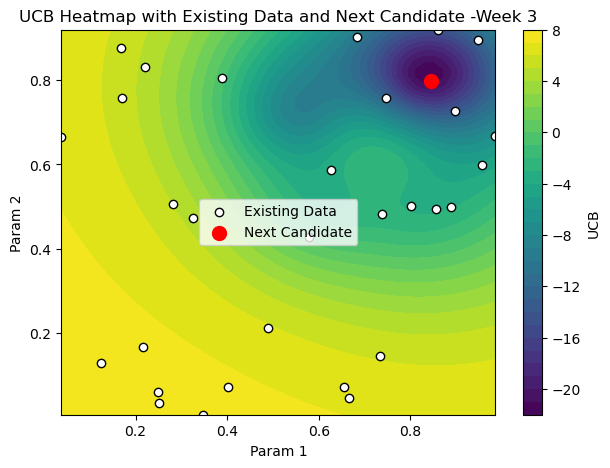

In [15]:
# Fix other dimensions (param3, param4) at mean
fixed_dims = [2, 3]  # indices of params to fix
fixed_values = X_wk3[:, fixed_dims].mean(axis=0)

# Create a grid for param1 and param2
param1_vals = np.linspace(X_wk3[:,0].min(), X_wk3[:,0].max(), 50)
param2_vals = np.linspace(X_wk3[:,1].min(), X_wk3[:,1].max(), 50)
grid_param1, grid_param2 = np.meshgrid(param1_vals, param2_vals)

# Prepare grid points in 4D
grid_points = np.zeros((grid_param1.size, 4))
grid_points[:,0] = grid_param1.ravel()
grid_points[:,1] = grid_param2.ravel()
grid_points[:,2] = fixed_values[0]  # param3 fixed
grid_points[:,3] = fixed_values[1]  # param4 fixed

# If you scaled your training data, scale grid too
scaler = StandardScaler()
scaler.fit(X_wk3)  # fit on original training data
grid_points_scaled = scaler.transform(grid_points)

# Predict GP mean and std
mu_grid, sigma_grid = gp.predict(grid_points_scaled, return_std=True)
UCB_grid = mu_grid + 3*sigma_grid
UCB_grid = UCB_grid.reshape(grid_param1.shape)

#Plot UCB heatmap
plt.figure(figsize=(7,5))
plt.contourf(grid_param1, grid_param2, UCB_grid, levels=30, cmap='viridis')
plt.colorbar(label='UCB')

# Plot existing data points
plt.scatter(X[:,0], X[:,1], c='white', edgecolor='k', label='Existing Data')

# Plot next candidate
x_next = np.array([0.84456876, 0.7990749, 0.71607125, 0.77741432])
plt.scatter(x_next[0], x_next[1], c='red', s=100, label='Next Candidate')

plt.xlabel('Param 1')
plt.ylabel('Param 2')
plt.title('UCB Heatmap with Existing Data and Next Candidate -Week 3')
plt.legend()
plt.show()

# **** Week 4 - Updated data ******

## Step 1: Load new data in

In [2]:
#Load in original input and output data 
inputdata = np.load('inputs_week3.npy')
outputdata = np.load('outputs_week3.npy')

#Read in text file of inputs
with open('../Inputs_Outputs/Week3/inputs.txt', 'r') as f:
    inputs_week4 = f.read()

with open('../Inputs_Outputs/Week3/outputs.txt', 'r') as f:
    outputs_week4 = f.read()

# Step 1: Define a safe namespace for eval
safe_globals = {'np': np, 'array': np.array}

# Step 2: Convert the text to actual Python objects
inputs_week4 = eval(inputs_week4, {"__builtins__": {}}, safe_globals)
outputs_week4 = eval(outputs_week4, {"__builtins__": {}}, safe_globals)

# Step 3: Optional: convert to NumPy arrays of objects
inputs_week4 = np.array(inputs_week4, dtype=object)
outputs_week4 = np.array(outputs_week4, dtype=object)

# Step 4: Select relevant data for your function. In this case we want function 1 inputs and outputs

F1_inputs_week4 = inputs_week4[3]
F1_outputs_week4 = outputs_week4[3]


# Step 5: merge with previous data
F1_inputs_week4 = F1_inputs_week4.reshape(1, -1)
inputdata_week4 = np.concatenate((inputdata,F1_inputs_week4), axis=0)

outputdata_week4 = np.concatenate((outputdata,np.array([F1_outputs_week4])))

print(inputdata_week4)
print(outputdata_week4)

# Save the results of these
np.save('inputs_week4.npy',inputdata_week4)
np.save('outputs_week4.npy', outputdata_week4)

[[0.89698105 0.72562797 0.17540431 0.70169437]
 [0.8893564  0.49958786 0.53926886 0.50878344]
 [0.25094624 0.03369313 0.14538002 0.49493242]
 [0.34696206 0.0062504  0.76056361 0.61302356]
 [0.12487118 0.12977019 0.38440048 0.2870761 ]
 [0.80130271 0.50023109 0.70664456 0.19510284]
 [0.24770826 0.06044543 0.04218635 0.44132425]
 [0.74670224 0.7570915  0.36935306 0.20656628]
 [0.40066503 0.07257425 0.88676825 0.24384229]
 [0.6260706  0.58675126 0.43880578 0.77885769]
 [0.95713529 0.59764438 0.76611385 0.77620991]
 [0.73281243 0.14524998 0.47681272 0.13336573]
 [0.65511548 0.07239183 0.68715175 0.08151656]
 [0.21973443 0.83203134 0.48286416 0.08256923]
 [0.48859419 0.2119651  0.93917791 0.37619173]
 [0.16713049 0.87655456 0.21723954 0.95980098]
 [0.21691119 0.16608583 0.24137226 0.77006248]
 [0.38748784 0.80453226 0.75179548 0.72382744]
 [0.98562189 0.66693268 0.15678328 0.8565348 ]
 [0.03782483 0.66485335 0.16198218 0.25392378]
 [0.68348638 0.9027701  0.33541983 0.99948256]
 [0.17034731 

## Step 2 : Visualise the updated results

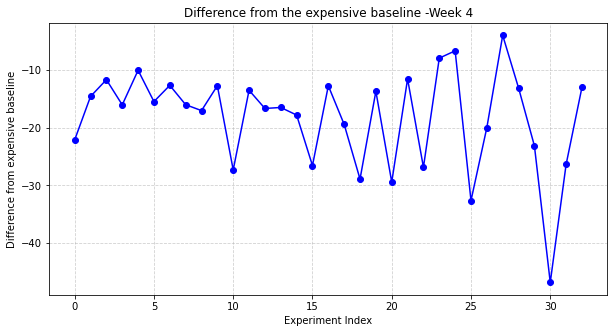

Best parameters: [0.57776561 0.42877174 0.42582587 0.24900741]
Lowest difference: -4.025542281908162


In [3]:
## what are the best outcomes

X_wk4 = inputdata_week4
y_wk4 = outputdata_week4


indices = np.arange(len(y_wk4))

plt.figure(figsize=(10,5))
plt.plot(indices, y_wk4, marker='o', linestyle='-', color='blue')
plt.xlabel('Experiment Index')
plt.ylabel('Difference from expensive baseline')
plt.title('Difference from the expensive baseline -Week 4')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# We can see from this plot that the best yield was from parameters in index 15
best_idx = np.argmax(y_wk4)
best_x = inputdata_week4[best_idx]
best_y = outputdata_week4[best_idx]

print("Best parameters:", best_x)
print("Lowest difference:", best_y)

## Step 3: Update GP model with new data

In [4]:
# Transform for maximisation
y_transformed = -y_wk4  # so larger = better

# Fit Gaussian Process
kernel = Matern(length_scale=0.5, nu=2.5)
gp = GaussianProcessRegressor(kernel=kernel, alpha=1e-2, normalize_y=True, n_restarts_optimizer=5, random_state=42)
gp.fit(X_wk4, y_transformed)

GaussianProcessRegressor(alpha=0.01, kernel=Matern(length_scale=0.5, nu=2.5),
                         n_restarts_optimizer=5, normalize_y=True,
                         random_state=42)

In [5]:
# Generate candidate hyperparameters
X_candidates = np.random.rand(5000,4)  # random sampling in 4D space

# GP predictions
mu, sigma = gp.predict(X_candidates, return_std=True)

## Step 4: Update acquisition function to EI

In [9]:
# Expected Improvement
y_max = y_transformed.max()
sigma_nonzero = np.copy(sigma)
sigma_nonzero[sigma_nonzero==0] = 1e-12
z = (mu - y_max) / sigma_nonzero
EI = (mu - y_max)*norm.cdf(z) + sigma*norm.pdf(z)
EI[sigma==0] = 0.0

# Select next hyperparameters
x_next = X_candidates[np.argmax(EI)]
print("Next hyperparameters to evaluate:", np.round(x_next,6))

Next hyperparameters to evaluate: [0.89598  0.957042 0.87241  0.997492]


# ****** Week 5: Updated data ******

## Step 1: Load in new data

In [2]:
#Load in original input and output data 
inputdata = np.load('inputs_week4.npy')
outputdata = np.load('outputs_week4.npy')

#Read in text file of inputs
with open('../Inputs_Outputs/Week4/inputs.txt', 'r') as f:
    inputs_week5 = f.read()

with open('../Inputs_Outputs/Week4/outputs.txt', 'r') as f:
    outputs_week5 = f.read()

# Step 1: Define a safe namespace for eval
safe_globals = {'np': np, 'array': np.array}

# Step 2: Convert the text to actual Python objects
inputs_week5 = eval(inputs_week5, {"__builtins__": {}}, safe_globals)
outputs_week5 = eval(outputs_week5, {"__builtins__": {}}, safe_globals)

# Step 3: Optional: convert to NumPy arrays of objects
inputs_week5 = np.array(inputs_week5, dtype=object)
outputs_week5 = np.array(outputs_week5, dtype=object)

# Step 4: Select relevant data for your function. In this case we want function 1 inputs and outputs

F1_inputs_week5 = inputs_week5[3]
F1_outputs_week5 = outputs_week5[3]


# Step 5: merge with previous data
F1_inputs_week5 = F1_inputs_week5.reshape(1, -1)
inputdata_week5 = np.concatenate((inputdata,F1_inputs_week5), axis=0)

outputdata_week5 = np.concatenate((outputdata,np.array([F1_outputs_week5])))

print(inputdata_week5)
print(outputdata_week5)

# Save the results of these
np.save('inputs_week5.npy',inputdata_week5)
np.save('outputs_week5.npy', outputdata_week5)

[[0.89698105 0.72562797 0.17540431 0.70169437]
 [0.8893564  0.49958786 0.53926886 0.50878344]
 [0.25094624 0.03369313 0.14538002 0.49493242]
 [0.34696206 0.0062504  0.76056361 0.61302356]
 [0.12487118 0.12977019 0.38440048 0.2870761 ]
 [0.80130271 0.50023109 0.70664456 0.19510284]
 [0.24770826 0.06044543 0.04218635 0.44132425]
 [0.74670224 0.7570915  0.36935306 0.20656628]
 [0.40066503 0.07257425 0.88676825 0.24384229]
 [0.6260706  0.58675126 0.43880578 0.77885769]
 [0.95713529 0.59764438 0.76611385 0.77620991]
 [0.73281243 0.14524998 0.47681272 0.13336573]
 [0.65511548 0.07239183 0.68715175 0.08151656]
 [0.21973443 0.83203134 0.48286416 0.08256923]
 [0.48859419 0.2119651  0.93917791 0.37619173]
 [0.16713049 0.87655456 0.21723954 0.95980098]
 [0.21691119 0.16608583 0.24137226 0.77006248]
 [0.38748784 0.80453226 0.75179548 0.72382744]
 [0.98562189 0.66693268 0.15678328 0.8565348 ]
 [0.03782483 0.66485335 0.16198218 0.25392378]
 [0.68348638 0.9027701  0.33541983 0.99948256]
 [0.17034731 

## Step 2 : Plot output data

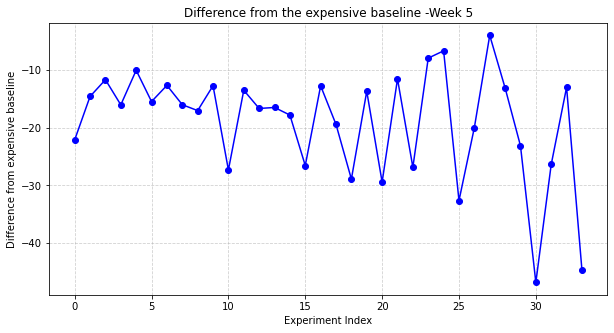

Best parameters: [0.57776561 0.42877174 0.42582587 0.24900741]
Lowest difference: -4.025542281908162


In [4]:
## what are the best outcomes

X_wk5 = inputdata_week5
y_wk5 = outputdata_week5


indices = np.arange(len(y_wk5))

plt.figure(figsize=(10,5))
plt.plot(indices, y_wk5, marker='o', linestyle='-', color='blue')
plt.xlabel('Experiment Index')
plt.ylabel('Difference from expensive baseline')
plt.title('Difference from the expensive baseline -Week 5')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# We can see from this plot that the best yield was from parameters in index 15
best_idx = np.argmax(y_wk5)
best_x = inputdata_week5[best_idx]
best_y = outputdata_week5[best_idx]

print("Best parameters:", best_x)
print("Lowest difference:", best_y)

## Step 3: Update GP surrogate model

In [6]:
# Transform for maximisation
y_transformed = -y_wk5  # so larger = better

# Fit Gaussian Process
kernel = Matern(length_scale=0.5, nu=2.5)
gp = GaussianProcessRegressor(kernel=kernel, alpha=1e-2, normalize_y=True, n_restarts_optimizer=5, random_state=42)
gp.fit(X_wk5, y_transformed)

GaussianProcessRegressor(alpha=0.01, kernel=Matern(length_scale=0.5, nu=2.5),
                         n_restarts_optimizer=5, normalize_y=True,
                         random_state=42)

## Step 4: Update acquisition function

In [7]:
# Generate candidate hyperparameters
X_candidates = np.random.rand(5000,4)  # random sampling in 4D space

# GP predictions
mu, sigma = gp.predict(X_candidates, return_std=True)

In [8]:
# Expected Improvement
y_max = y_transformed.max()
sigma_nonzero = np.copy(sigma)
sigma_nonzero[sigma_nonzero==0] = 1e-12
z = (mu - y_max) / sigma_nonzero
EI = (mu - y_max)*norm.cdf(z) + sigma*norm.pdf(z)
EI[sigma==0] = 0.0

# Select next hyperparameters
x_next = X_candidates[np.argmax(EI)]
print("Next hyperparameters to evaluate:", np.round(x_next,6))

Next hyperparameters to evaluate: [0.96959  0.945548 0.985403 0.902026]


# ***** Week 6: Updated data *****

## Step 1: Load in updated data

In [2]:
#Load in original input and output data 
inputdata = np.load('inputs_week5.npy')
outputdata = np.load('outputs_week5.npy')

#Read in text file of inputs
with open('../Inputs_Outputs/Week5/inputs.txt', 'r') as f:
    inputs_week6 = f.read()

with open('../Inputs_Outputs/Week5/outputs.txt', 'r') as f:
    outputs_week6 = f.read()

# Step 1: Define a safe namespace for eval
safe_globals = {'np': np, 'array': np.array}

# Step 2: Convert the text to actual Python objects
inputs_week6 = eval(inputs_week6, {"__builtins__": {}}, safe_globals)
outputs_week6 = eval(outputs_week6, {"__builtins__": {}}, safe_globals)

# Step 3: Optional: convert to NumPy arrays of objects
inputs_week6 = np.array(inputs_week6, dtype=object)
outputs_week6 = np.array(outputs_week6, dtype=object)

# Step 4: Select relevant data for your function. In this case we want function 1 inputs and outputs

F1_inputs_week6 = inputs_week6[3]
F1_outputs_week6 = outputs_week6[3]


# Step 5: merge with previous data
F1_inputs_week6 = F1_inputs_week6.reshape(1, -1)
inputdata_week6 = np.concatenate((inputdata,F1_inputs_week6), axis=0)

outputdata_week6 = np.concatenate((outputdata,np.array([F1_outputs_week6])))

print(inputdata_week6)
print(outputdata_week6)

# Save the results of these
np.save('inputs_week6.npy',inputdata_week6)
np.save('outputs_week6.npy', outputdata_week6)

[[0.89698105 0.72562797 0.17540431 0.70169437]
 [0.8893564  0.49958786 0.53926886 0.50878344]
 [0.25094624 0.03369313 0.14538002 0.49493242]
 [0.34696206 0.0062504  0.76056361 0.61302356]
 [0.12487118 0.12977019 0.38440048 0.2870761 ]
 [0.80130271 0.50023109 0.70664456 0.19510284]
 [0.24770826 0.06044543 0.04218635 0.44132425]
 [0.74670224 0.7570915  0.36935306 0.20656628]
 [0.40066503 0.07257425 0.88676825 0.24384229]
 [0.6260706  0.58675126 0.43880578 0.77885769]
 [0.95713529 0.59764438 0.76611385 0.77620991]
 [0.73281243 0.14524998 0.47681272 0.13336573]
 [0.65511548 0.07239183 0.68715175 0.08151656]
 [0.21973443 0.83203134 0.48286416 0.08256923]
 [0.48859419 0.2119651  0.93917791 0.37619173]
 [0.16713049 0.87655456 0.21723954 0.95980098]
 [0.21691119 0.16608583 0.24137226 0.77006248]
 [0.38748784 0.80453226 0.75179548 0.72382744]
 [0.98562189 0.66693268 0.15678328 0.8565348 ]
 [0.03782483 0.66485335 0.16198218 0.25392378]
 [0.68348638 0.9027701  0.33541983 0.99948256]
 [0.17034731 

## Step 2: Plot output

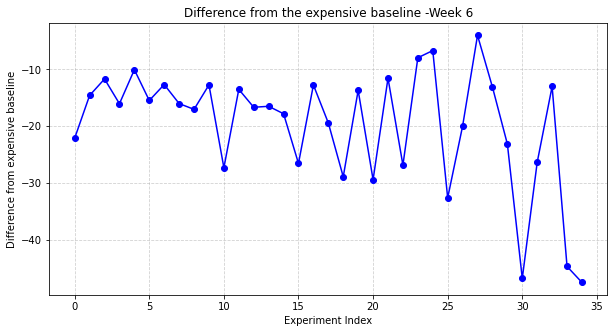

Best parameters: [0.57776561 0.42877174 0.42582587 0.24900741]
Lowest difference: -4.025542281908162


In [6]:
## what are the best outcomes

X_wk6 = inputdata_week6
y_wk6 = outputdata_week6


indices = np.arange(len(y_wk6))

plt.figure(figsize=(10,5))
plt.plot(indices, y_wk6, marker='o', linestyle='-', color='blue')
plt.xlabel('Experiment Index')
plt.ylabel('Difference from expensive baseline')
plt.title('Difference from the expensive baseline -Week 6')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# We can see from this plot that the best yield was from parameters in index 15
best_idx = np.argmax(y_wk6)
best_x = inputdata_week6[best_idx]
best_y = outputdata_week6[best_idx]

print("Best parameters:", best_x)
print("Lowest difference:", best_y)

## Key points and considerations to change this week:

#### 1. Change EI as my problem has many local optima, that drift over time (biweekly). EI tends to overexplore uncertain regions or get distracted by noise. 

#### 2. My kernel is over-smoothing, whereas my data demonstrates large jumps in output for small hyperparameter changes and strong interactions between parameters. Because it is too smooth, this means that the GP believes the landscape is smoother than it really is.

#### 3. Random candidate sampling in 4D is probably not the best route to go 



### How to improve?

#### 1. Switch from EI to UCB
#### 2. Let GP learn anisotropic length scales - currently GP assumes all 4 hyperparaemeters are equally sensitive.
#### 3. Add trust-region behaviour- instead of searching everywhere, bias around what already works (e.g., avoiding jumping to unstable configurations or chasing noise in unexplored regions. This underlies TuRBO.
#### 4. Stabilise target values -large outliers distort GP training, use a rank or log transform .

## Step 3: Transform data and update kernel in GP model

In [7]:
# We want to maximise performance (smaller error vs baseline is better)
# Rank transform stabilises noisy, non-stationary objectives
from scipy.stats import rankdata
y_transformed = rankdata(-y_wk6)

# Make kernel less smooth to account for the jumps in the landscape
kernel = Matern(
    length_scale=[0.3, 0.3, 0.3, 0.3],
    length_scale_bounds=(1e-2, 2.0),
    nu=1.5
)

gp = GaussianProcessRegressor(
    kernel=kernel,
    alpha=1e-2,          # noise level
    normalize_y=True,
    n_restarts_optimizer=10,
    random_state=42
)

gp.fit(X_wk6, y_transformed)

GaussianProcessRegressor(alpha=0.01,
                         kernel=Matern(length_scale=[0.3, 0.3, 0.3, 0.3], nu=1.5),
                         n_restarts_optimizer=10, normalize_y=True,
                         random_state=42)

## Step 4: Update candidate regions and change acquisition function to make it more robust

In [8]:
# Random sampling (works well with trust-region bias)
X_candidates = np.random.rand(8000, 4)

# GP prediction 

mu, sigma = gp.predict(X_candidates, return_std=True)
sigma = np.maximum(sigma, 1e-9)

#New acquisition function with pessimism
# Upper Confidence Bound
kappa = 1.0          # exploration
risk_penalty = 0.5   # robustness

acq = mu + kappa * sigma - risk_penalty * sigma

## Step 5: Implement a trusted region bias and identify next candidate values

In [9]:
best_idx = np.argmax(y_transformed)
x_best = X_wk6[best_idx]

dist = np.linalg.norm(X_candidates - x_best, axis=1)
acq *= np.exp(-dist / 0.4)

# Next candidates
x_next = X_candidates[np.argmax(acq)]
print("Next hyperparameters to evaluate:", np.round(x_next, 6))

Next hyperparameters to evaluate: [0.931297 0.902255 0.949457 0.94012 ]


# ***** Week 7 ********

## Step 1: Load in updated data

In [2]:
#Load in original input and output data 
inputdata = np.load('inputs_week6.npy')
outputdata = np.load('outputs_week6.npy')

#Read in text file of inputs
with open('../Inputs_Outputs/Week6/inputs.txt', 'r') as f:
    inputs_week7 = f.read()

with open('../Inputs_Outputs/Week6/outputs.txt', 'r') as f:
    outputs_week7 = f.read()

# Step 1: Define a safe namespace for eval
safe_globals = {'np': np, 'array': np.array}

# Step 2: Convert the text to actual Python objects
inputs_week7 = eval(inputs_week7, {"__builtins__": {}}, safe_globals)
outputs_week7 = eval(outputs_week7, {"__builtins__": {}}, safe_globals)

# Step 3: Optional: convert to NumPy arrays of objects
inputs_week7 = np.array(inputs_week7, dtype=object)
outputs_week7 = np.array(outputs_week7, dtype=object)

# Step 4: Select relevant data for your function. In this case we want function 1 inputs and outputs

F1_inputs_week7 = inputs_week7[3]
F1_outputs_week7 = outputs_week7[3]


# Step 5: merge with previous data
F1_inputs_week7 = F1_inputs_week7.reshape(1, -1)
inputdata_week7 = np.concatenate((inputdata,F1_inputs_week7), axis=0)

outputdata_week7 = np.concatenate((outputdata,np.array([F1_outputs_week7])))

print(inputdata_week7)
print(outputdata_week7)

# Save the results of these
np.save('inputs_week7.npy',inputdata_week7)
np.save('outputs_week7.npy', outputdata_week7)

[[0.89698105 0.72562797 0.17540431 0.70169437]
 [0.8893564  0.49958786 0.53926886 0.50878344]
 [0.25094624 0.03369313 0.14538002 0.49493242]
 [0.34696206 0.0062504  0.76056361 0.61302356]
 [0.12487118 0.12977019 0.38440048 0.2870761 ]
 [0.80130271 0.50023109 0.70664456 0.19510284]
 [0.24770826 0.06044543 0.04218635 0.44132425]
 [0.74670224 0.7570915  0.36935306 0.20656628]
 [0.40066503 0.07257425 0.88676825 0.24384229]
 [0.6260706  0.58675126 0.43880578 0.77885769]
 [0.95713529 0.59764438 0.76611385 0.77620991]
 [0.73281243 0.14524998 0.47681272 0.13336573]
 [0.65511548 0.07239183 0.68715175 0.08151656]
 [0.21973443 0.83203134 0.48286416 0.08256923]
 [0.48859419 0.2119651  0.93917791 0.37619173]
 [0.16713049 0.87655456 0.21723954 0.95980098]
 [0.21691119 0.16608583 0.24137226 0.77006248]
 [0.38748784 0.80453226 0.75179548 0.72382744]
 [0.98562189 0.66693268 0.15678328 0.8565348 ]
 [0.03782483 0.66485335 0.16198218 0.25392378]
 [0.68348638 0.9027701  0.33541983 0.99948256]
 [0.17034731 

## Step 2: Visualise the output

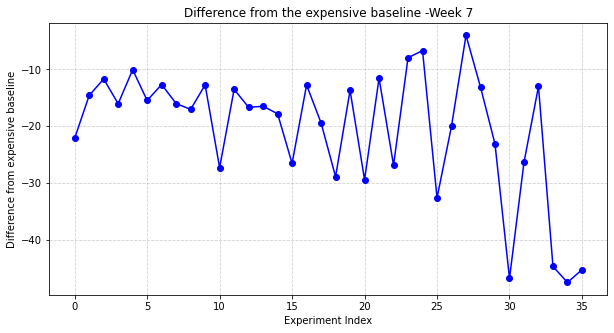

Best parameters: [0.57776561 0.42877174 0.42582587 0.24900741]
Lowest difference: -4.025542281908162


In [3]:
## what are the best outcomes

X_wk7 = inputdata_week7
y_wk7 = outputdata_week7


indices = np.arange(len(y_wk7))

plt.figure(figsize=(10,5))
plt.plot(indices, y_wk7, marker='o', linestyle='-', color='blue')
plt.xlabel('Experiment Index')
plt.ylabel('Difference from expensive baseline')
plt.title('Difference from the expensive baseline -Week 7')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# We can see from this plot that the best yield was from parameters in index 15
best_idx = np.argmax(y_wk7)
best_x = inputdata_week7[best_idx]
best_y = outputdata_week7[best_idx]

print("Best parameters:", best_x)
print("Lowest difference:", best_y)

## Ways to improve this week

### Point 1: Changing how to transform the output - rank-transformation can ensure stability, but using rank can also hide the magnitude, e.g., its order based rather than impact based, meaning GP struggles to distinguish slightly better with much better. 
### Fix 1: Using a hybrid transformation instead - e.g., centre and then transform to handle extreme outliers and preserve severity of warehouse failures/expenses.

### Point 2: The acquisition function is still providing optimism in high-uncertaintly regions
### Fix 2: Use a lower confidence bound in EI

## Step 3: Update transformation of output and run GP

In [4]:
# Hybrid magnitude-preserving transformation

y_centered = y_wk7 - np.median(y_wk7)
y_transformed = np.sign(y_centered) * np.log1p(np.abs(y_centered))


# Gaussian Process surrogate model

kernel = Matern(
    length_scale=[0.3, 0.3, 0.3, 0.3],
    length_scale_bounds=(1e-2, 2.0),
    nu=1.5
)

gp = GaussianProcessRegressor(
    kernel=kernel,
    alpha=1e-2,
    normalize_y=True,
    n_restarts_optimizer=10,
    random_state=42
)

gp.fit(X_wk7, y_transformed)


# Candidate sampling

X_candidates = np.random.rand(8000, 4)

mu, sigma = gp.predict(X_candidates, return_std=True)
sigma = np.maximum(sigma, 1e-9)


## Step 4: Update acquisition function with lower confidence bound

In [5]:
beta = 1.0  # risk aversion
acq = mu - beta * sigma

# Trust-region bias (unchanged)
best_idx = np.argmax(y_transformed)
x_best = X_wk7[best_idx]

dist = np.linalg.norm(X_candidates - x_best, axis=1)
acq *= np.exp(-dist / 0.4)


# Next candidates

x_next = X_candidates[np.argmax(acq)]
print("Next hyperparameters to evaluate:", np.round(x_next, 6))

Next hyperparameters to evaluate: [0.540305 0.446534 0.452633 0.234405]
